In [ ]:
import glob
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
data_dir = '/content/drive/MyDrive/GRA/Datasets/EV Data/Hyundai_Ioniq_5/'

In [65]:
# glob to find all CSV files in the directory and its subdirectories
csv_files = glob.glob(f'{data_dir}/**/*.csv', recursive=True)

In [66]:
len(csv_files)

272

In [74]:
# # Read all CSV files and add a column for the file path
# dataframes = []
# for file in csv_files:
#     df = pd.read_csv(file)
#     df['file_path'] = file  # Add a new column with the file path
#     dataframes.append(df)

# Read all CSV files, add a 'file_path' column, and combine into a single DataFrame
combined_df = pd.concat(
    [pd.read_csv(file).assign(file_path=file) for file in csv_files],
    ignore_index=True
)

In [68]:
# len(dataframes)

272

In [69]:
# # Optionally, concatenate all DataFrames into a single DataFrame
# combined_df = pd.concat(dataframes, ignore_index=True)

In [75]:
combined_df.shape

(741172, 8)

In [76]:
combined_df.head()

,Unnamed: 0,Time,Speed Follower,Speed Leader,Smooth Speed Follower,Smooth Speed Leader,Spacing,file_path
0,0,2033.00,55.31,55.130,54.9484,55.1524,27.307067,/content/drive/MyDrive/GRA/Datasets/EV Data/Hy...
1,1,2033.02,55.17,55.255,54.9588,55.1654,27.315506,/content/drive/MyDrive/GRA/Datasets/EV Data/Hy...
2,2,2033.04,55.03,55.380,54.9626,55.1838,27.323949,/content/drive/MyDrive/GRA/Datasets/EV Data/Hy...
3,3,2033.06,55.04,55.430,54.9658,55.2046,27.319727,/content/drive/MyDrive/GRA/Datasets/EV Data/Hy...
4,4,2033.08,55.05,55.480,54.9726,55.2198,27.315506,/content/drive/MyDrive/GRA/Datasets/EV Data/Hy...


In [72]:
# for i,row in combined_df.iterrows():
#   combined_df['gap_setting'] = row['file_path'].split('/')[-5].strip()
#   combined_df['desired_speed'] = row['file_path'].split('/')[-4].strip()
#   combined_df['free_flow_speed'] = row['file_path'].split('/')[-3].strip()
#   combined_df['speed_fluctuation'] = row['file_path'].split('/')[-2].strip()

In [78]:
# Extract the required parts from the file_path column
combined_df['gap_setting'] = combined_df['file_path'].str.split('/').str[-5].str.strip()
combined_df['desired_speed'] = combined_df['file_path'].str.split('/').str[-4].str.strip().str.split('_').str[0].str.strip()
combined_df['free_flow_speed'] = combined_df['file_path'].str.split('/').str[-3].str.strip()
combined_df['speed_fluctuation'] = combined_df['file_path'].str.split('/').str[-2].str.strip()

# Display the updated DataFrame
combined_df.head()

,Unnamed: 0,Time,Speed Follower,Speed Leader,Smooth Speed Follower,Smooth Speed Leader,Spacing,file_path,gap_setting,desired_speed,free_flow_speed,speed_fluctuation
0,0,2033.00,55.31,55.130,54.9484,55.1524,27.307067,/content/drive/MyDrive/GRA/Datasets/EV Data/Hy...,Long,0,35,0
1,1,2033.02,55.17,55.255,54.9588,55.1654,27.315506,/content/drive/MyDrive/GRA/Datasets/EV Data/Hy...,Long,0,35,0
2,2,2033.04,55.03,55.380,54.9626,55.1838,27.323949,/content/drive/MyDrive/GRA/Datasets/EV Data/Hy...,Long,0,35,0
3,3,2033.06,55.04,55.430,54.9658,55.2046,27.319727,/content/drive/MyDrive/GRA/Datasets/EV Data/Hy...,Long,0,35,0
4,4,2033.08,55.05,55.480,54.9726,55.2198,27.315506,/content/drive/MyDrive/GRA/Datasets/EV Data/Hy...,Long,0,35,0


In [79]:
combined_df.shape

(741172, 12)

In [80]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741172 entries, 0 to 741171
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             741172 non-null  int64  
 1   Time                   741172 non-null  float64
 2   Speed Follower         741172 non-null  float64
 3   Speed Leader           741172 non-null  float64
 4   Smooth Speed Follower  741172 non-null  float64
 5   Smooth Speed Leader    741172 non-null  float64
 6   Spacing                741172 non-null  float64
 7   file_path              741172 non-null  object 
 8   gap_setting            741172 non-null  object 
 9   desired_speed          741172 non-null  object 
 10  free_flow_speed        741172 non-null  object 
 11  speed_fluctuation      741172 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 67.9+ MB


In [81]:
combined_df['gap_setting'].value_counts()

,count
gap_setting,
XLong,193268
Short,184718
Long,181868
Medium,181318


In [82]:
# function to plot categorical feauture distribution

import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_distribution(df, column_name):

  plt.figure(figsize=(10, 6))
  sns.countplot(x=column_name, data=df)
  plt.title(f'Distribution of {column_name}')
  plt.xlabel(column_name)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.show()

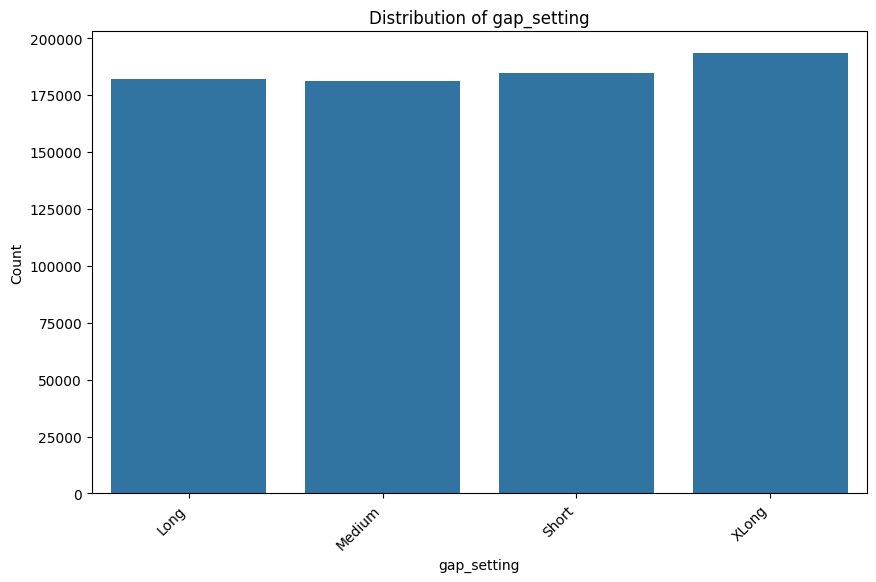

In [83]:
plot_categorical_distribution(combined_df, 'gap_setting')

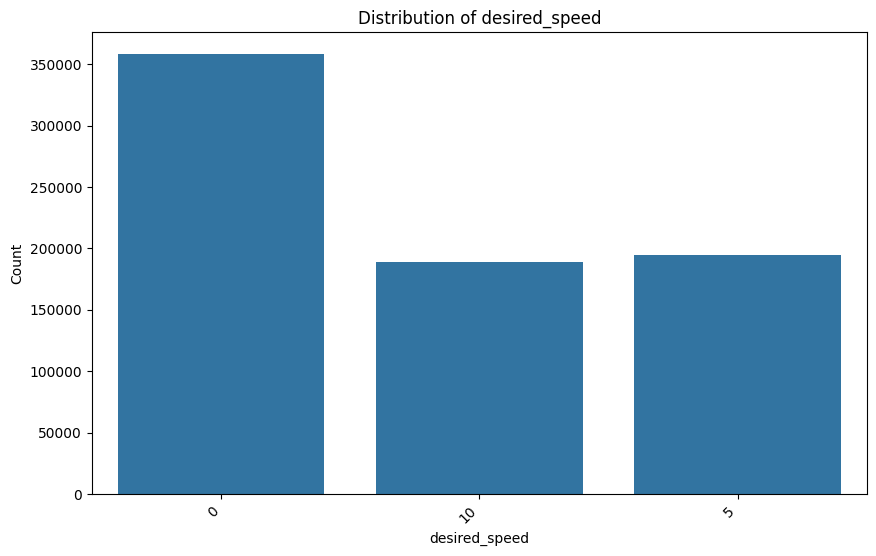

In [84]:
plot_categorical_distribution(combined_df, 'desired_speed')

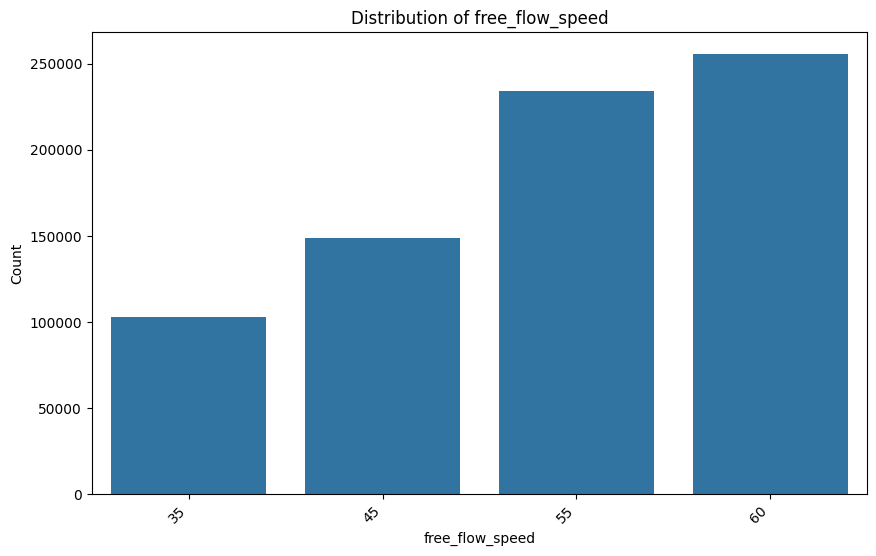

In [85]:
plot_categorical_distribution(combined_df, 'free_flow_speed')

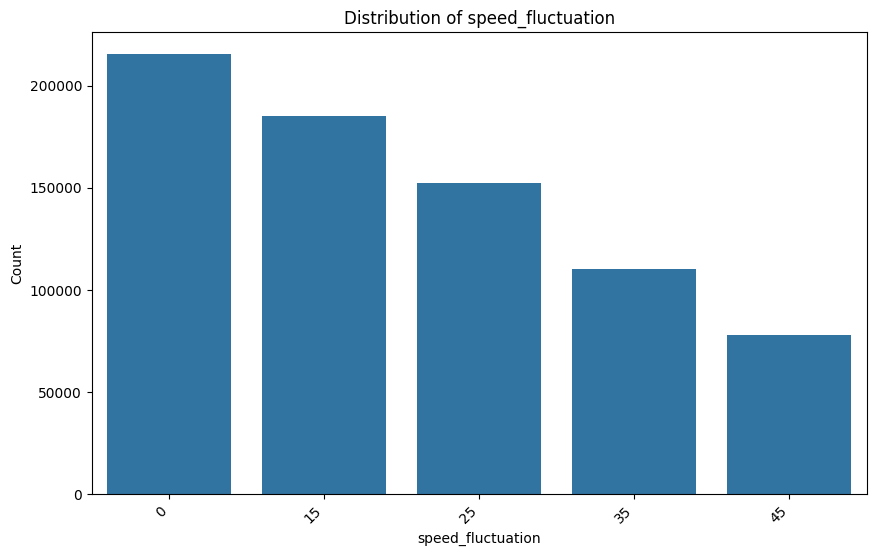

In [86]:
plot_categorical_distribution(combined_df, 'speed_fluctuation')

In [87]:
combined_df.to_csv('/content/drive/MyDrive/GRA/Datasets/EV Data/Hyundai_Ioniq_5/combined_data.csv', index=False)

## Correlation

In [89]:
# Define a mapping for ordinal encoding
gap_setting_mapping = {'Short': 0, 'Medium': 1, 'Long': 2, 'XLong': 3}

# Apply the mapping
combined_df['gap_setting_numeric'] = combined_df['gap_setting'].map(gap_setting_mapping)

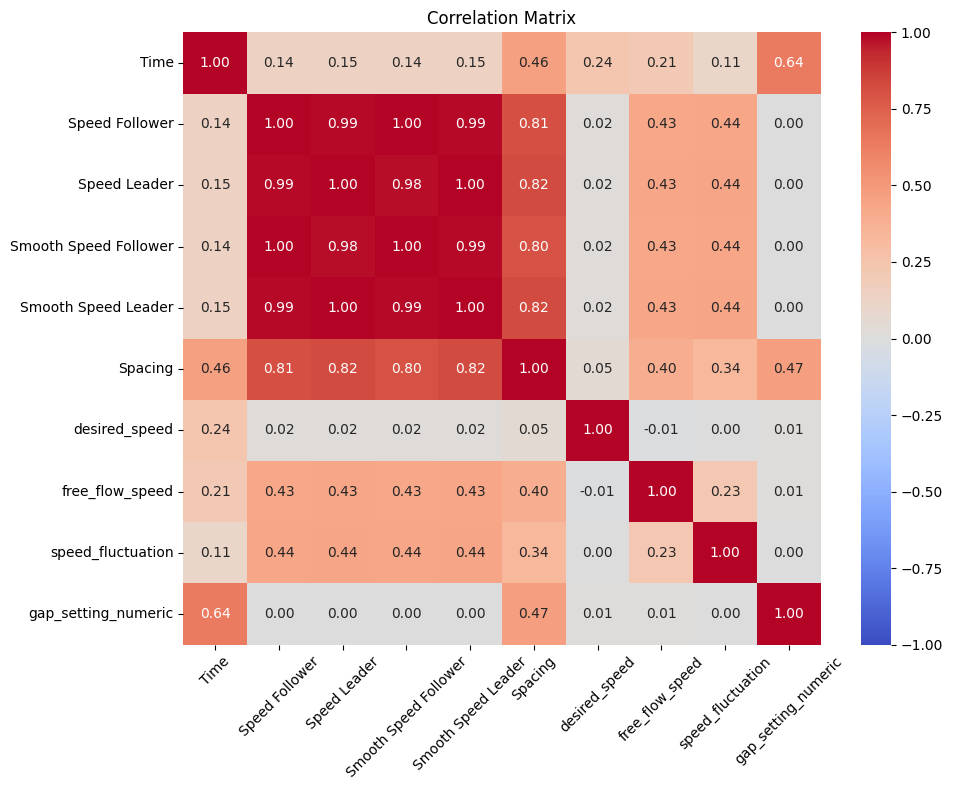

In [93]:
# plot correlation
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = combined_df.drop(columns=['file_path','gap_setting','Unnamed: 0']).corr()
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

# Add title and labels
plt.title('Correlation Matrix')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()       # Adjust layout to prevent overlap

# Show the plot
plt.show()



In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_relationships(df, time_col='Time', gap_setting_col='gap_setting_numeric', spacing_col='Spacing'):
    # Set the style for the plots
    sns.set(style="whitegrid")

    # Create a figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Relationships Between Time, Gap Setting, and Spacing', fontsize=16)

    # Scatter plot: Time vs Spacing
    sns.scatterplot(ax=axes[0, 0], x=df[time_col], y=df[spacing_col], hue=df[gap_setting_col], palette='viridis')
    axes[0, 0].set_title('Time vs Spacing (Colored by Gap Setting)')
    axes[0, 0].set_xlabel('Time')
    axes[0, 0].set_ylabel('Spacing')

    # Scatter plot: Gap Setting vs Spacing
    sns.scatterplot(ax=axes[0, 1], x=df[gap_setting_col], y=df[spacing_col], hue=df[time_col], palette='coolwarm')
    axes[0, 1].set_title('Gap Setting vs Spacing (Colored by Time)')
    axes[0, 1].set_xlabel('Gap Setting')
    axes[0, 1].set_ylabel('Spacing')

    # Time-series plot: Time vs Spacing
    sns.lineplot(ax=axes[1, 0], x=df[time_col], y=df[spacing_col], hue=df[gap_setting_col], palette='viridis')
    axes[1, 0].set_title('Time vs Spacing Over Time (Colored by Gap Setting)')
    axes[1, 0].set_xlabel('Time')
    axes[1, 0].set_ylabel('Spacing')

    # Time-series plot: Time vs Gap Setting
    sns.lineplot(ax=axes[1, 1], x=df[time_col], y=df[gap_setting_col], palette='viridis')
    axes[1, 1].set_title('Time vs Gap Setting Over Time')
    axes[1, 1].set_xlabel('Time')
    axes[1, 1].set_ylabel('Gap Setting')

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

<ipython-input-94-8031fa6a3b35>:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(ax=axes[1, 1], x=df[time_col], y=df[gap_setting_col], palette='viridis')
<ipython-input-94-8031fa6a3b35>:37: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


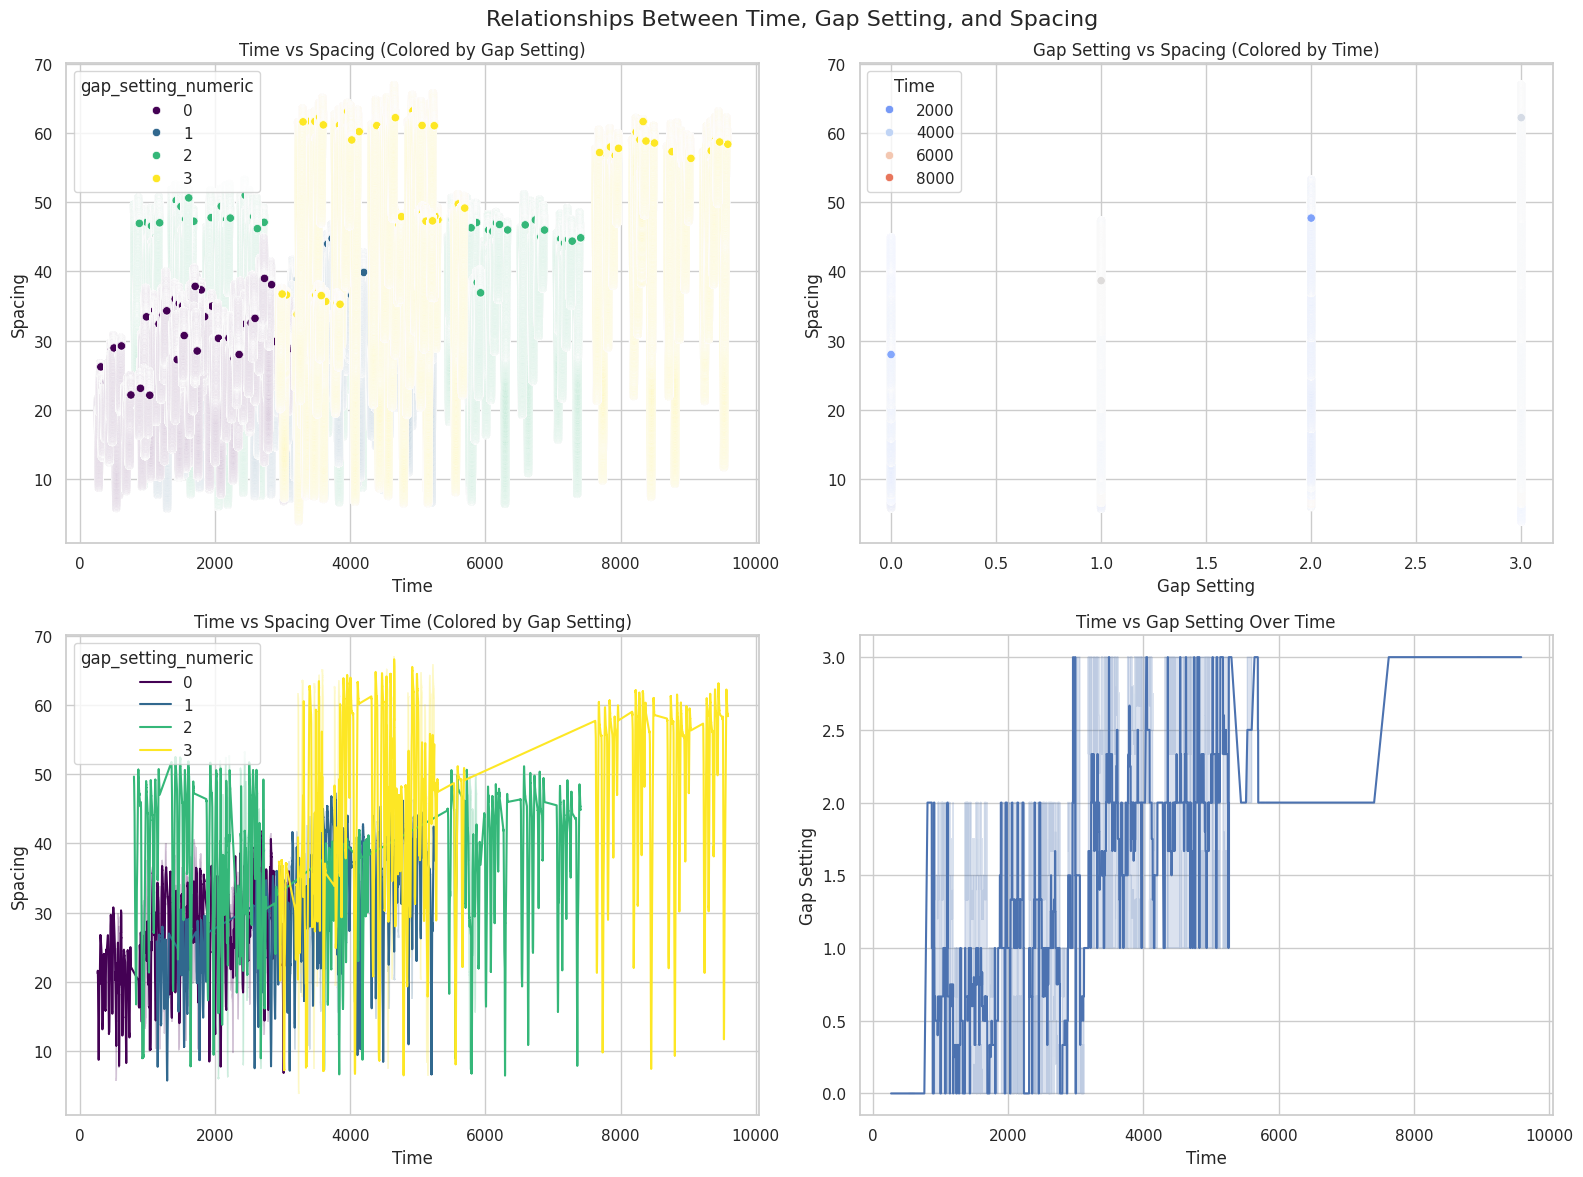

In [95]:
# Call the function with your DataFrame
visualize_relationships(combined_df)